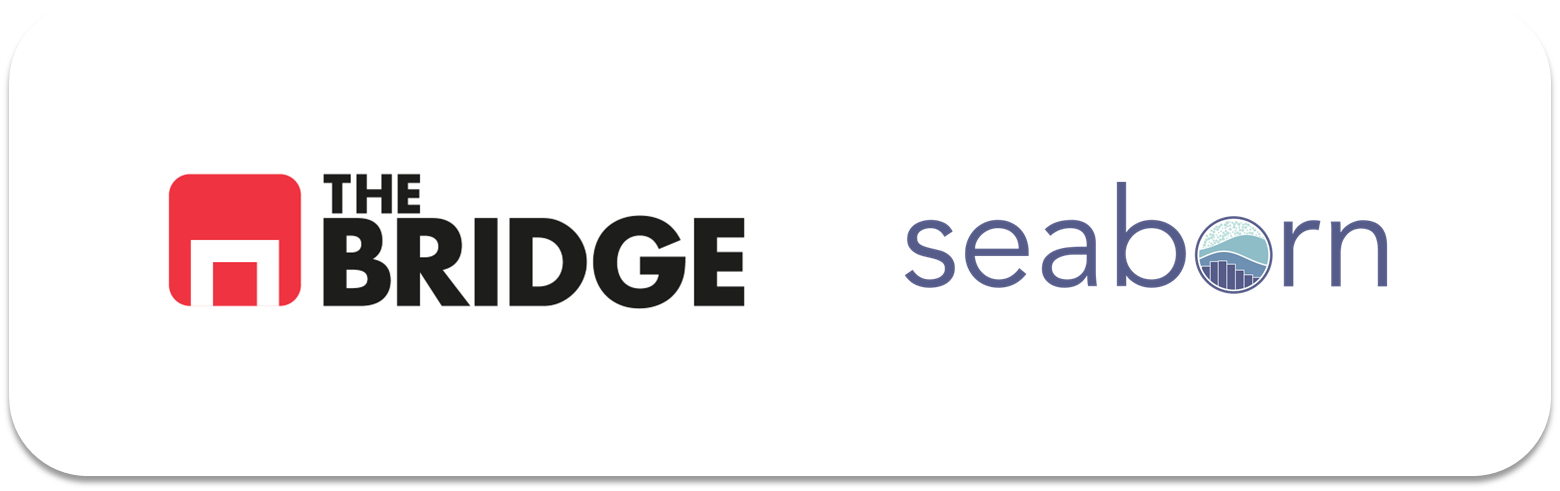

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [3]:
df.dropna(inplace=True)

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

<Axes: >

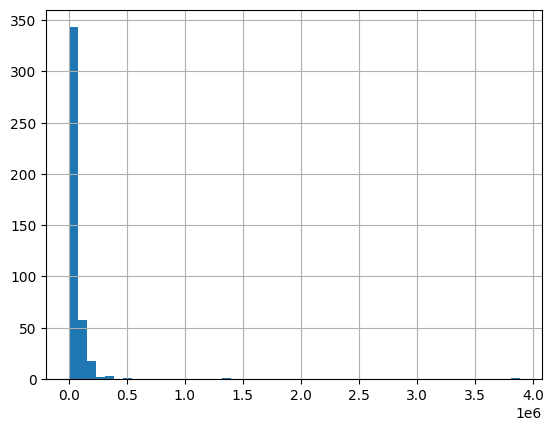

In [4]:
df["population_total"].hist(bins=50)

<Axes: >

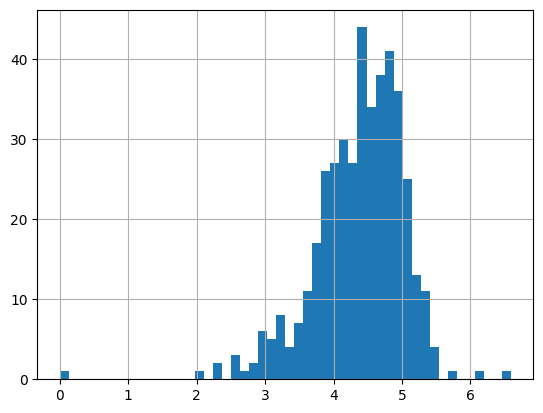

In [5]:
np.log10(df['population_total']).hist(bins=50)

In [12]:
def pintar_dispersion(df, col_num1, col_num2, col_color=None, size_col=20, scale=1, legend=True, alpha=0.5):

    plt.figure(figsize=(20, 10))

    if isinstance(size_col, str):
        sizes = df[size_col] * scale 
    else:
        sizes = size_col 

    if col_color is not None:
        ax = sns.scatterplot(
            x=col_num1,
            y=col_num2,
            data=df,
            hue=col_color,
            size=sizes,
            palette='viridis',
            legend=legend,
            alpha=alpha,
            sizes=(10, 1000)
        )
    else:
        ax = sns.scatterplot(
            x=col_num1,
            y=col_num2,
            data=df,
            size=sizes,
            legend=legend,
            alpha=alpha,
            sizes=(1, 250)
        )

    ax.set_title(f'Scatter Plot de {col_num1} vs {col_num2}')
    ax.set_xlabel(col_num1)
    ax.set_ylabel(col_num2)

    if legend:
        leg = ax.legend()
        if leg:
            leg.set_title(leg.get_title().get_text())
            leg._legend_box.sep = 10  

    plt.show()



In [10]:
df['log_population'] = np.log10(df['population_total'])
df['log_population']

0      4.501949
1      4.308137
4      4.919544
5      4.679637
6      3.451326
         ...   
477    3.467312
478    3.890141
479    4.812412
480    4.710684
481    4.315970
Name: log_population, Length: 427, dtype: float64

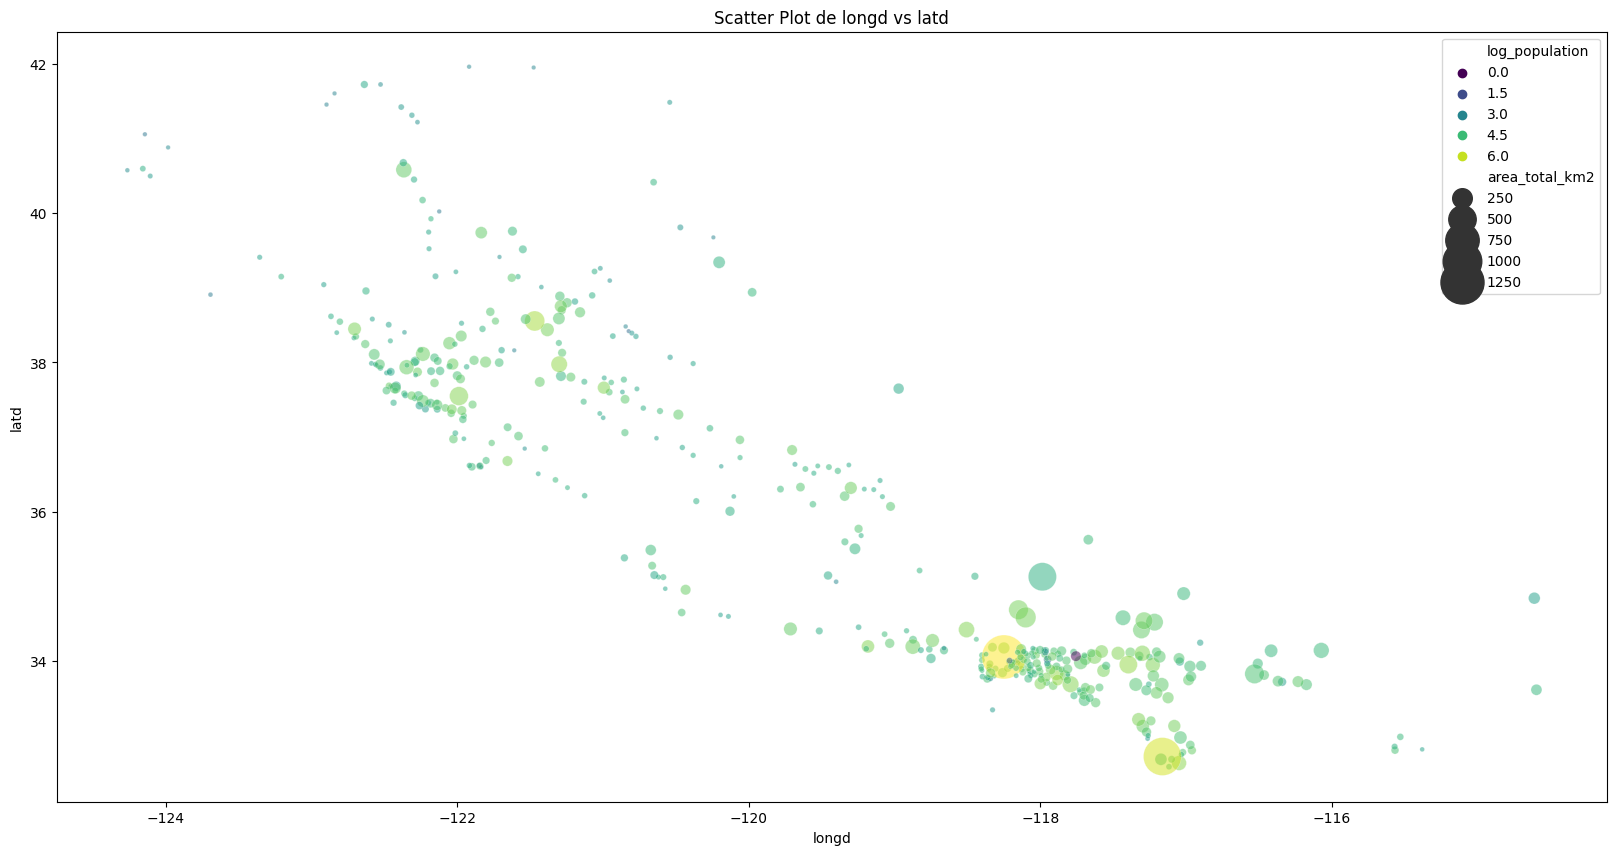

In [13]:
pintar_dispersion(df, 'longd', 'latd', "log_population" ,size_col="area_total_km2") 


In [ ]:
pintar_dispersion(df, 'longd', 'latd', "log_population" ,size_col="area_total_km2") 


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

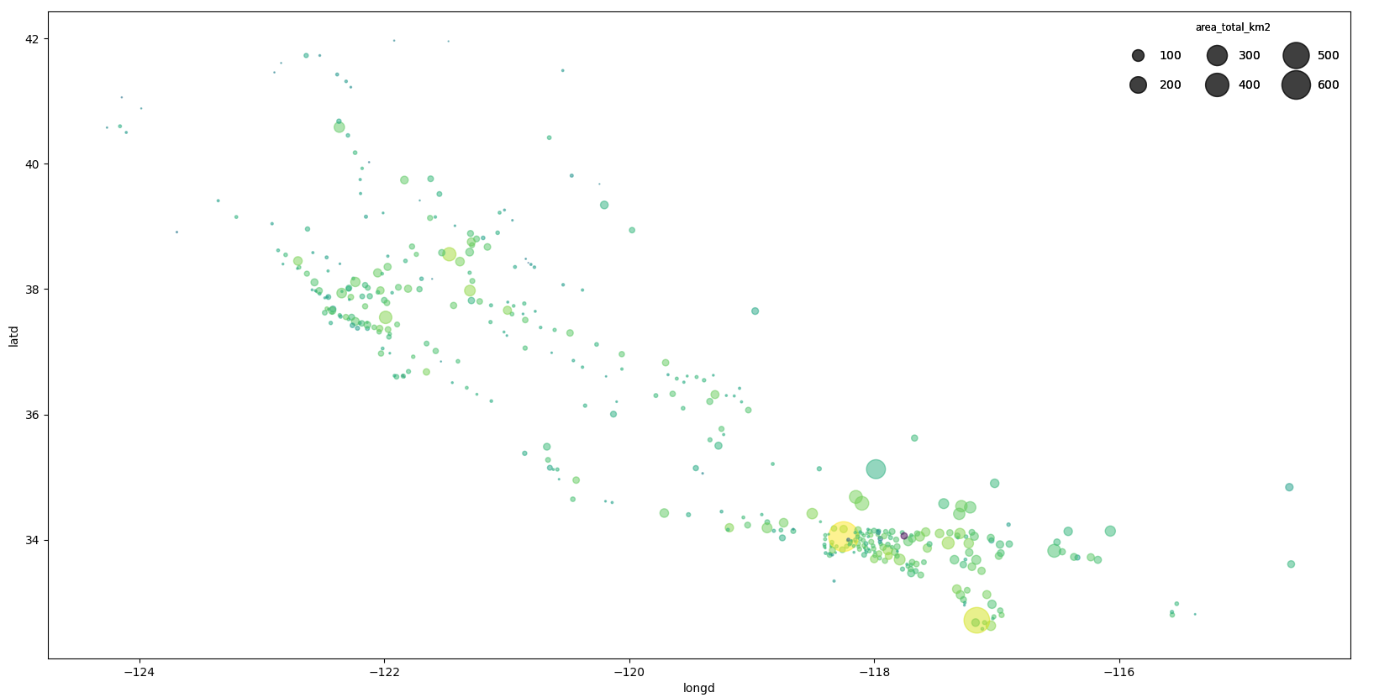

In [10]:
df['log_poblacion'] = np.log10(df['population_total'])

In [14]:
def pintar_dispersion_controle(df, x_col, y_col, color_col= None, size_col = "", scale= 1, legend= True):

    fig, ax = plt.subplots(figsize=(20,10))
    sizes=(10,1000)

    if type(size_col) == str:
        if size_col != "":
            if color_col:
                scatter = sns.scatterplot(data = df,
                                          x = x_col, 
                                          y = y_col, 
                                          size = df[size_col] * scale, 
                                          hue = color_col, 
                                          alpha = 0.5, 
                                          palette = "viridis", 
                                          ax = ax, 
                                          sizes = sizes)
            else:
                scatter = sns.scatterplot(data = df,
                                          x = x_col, 
                                          y = y_col, 
                                          size = df[size_col] * scale, 
                                          alpha = 0.5, 
                                        #   palette = "viridis", 
                                          ax = ax, 
                                          sizes = sizes)
        elif color_col:
            scatter = sns.scatterplot(data = df,
                                      x = x_col, 
                                      y = y_col, 
                                      hue = color_col, 
                                      alpha=0.5, 
                                      palette='viridis', 
                                      ax = ax, 
                                      sizes = sizes)
        
    else:
        scatter = sns.scatterplot(data = df,
                                  x = x_col, 
                                  y = y_col, 
                                  size = size_col, 
                                  alpha=0.5, 
                                #   palette='viridis', 
                                  ax = ax, 
                                  sizes = sizes)
    
    if legend:
        ax.legend(ncol = 2, loc="upper right", frameon = False, labelspacing = 1.5)

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    return ax



<Axes: xlabel='longd', ylabel='latd'>

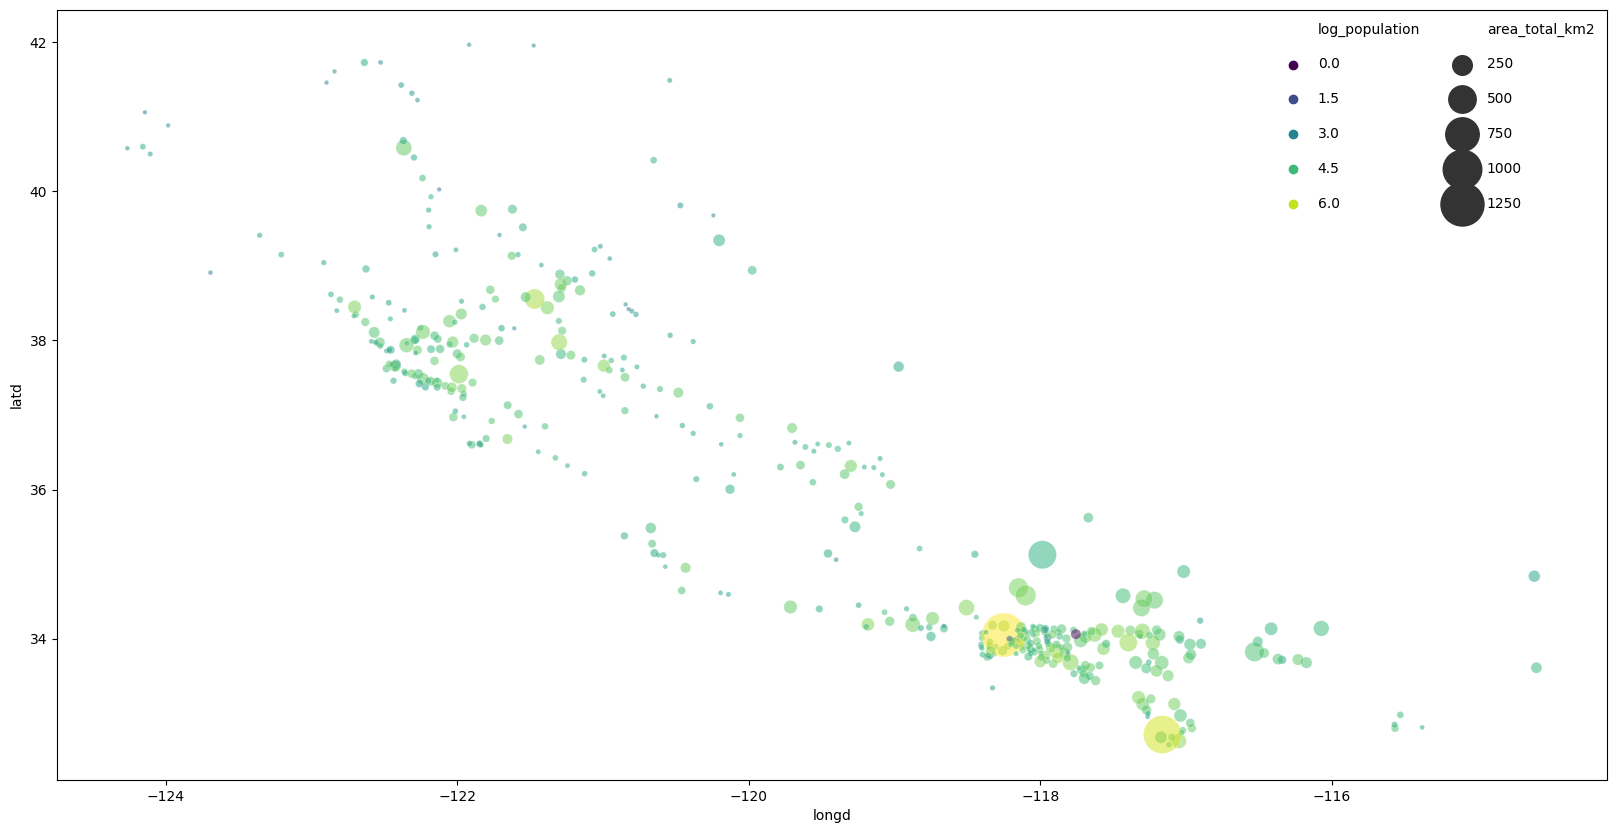

In [15]:
pintar_dispersion_controle(df, 'longd', 'latd', "log_population" ,size_col="area_total_km2") 


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [42]:
df = pd.read_csv("./data/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


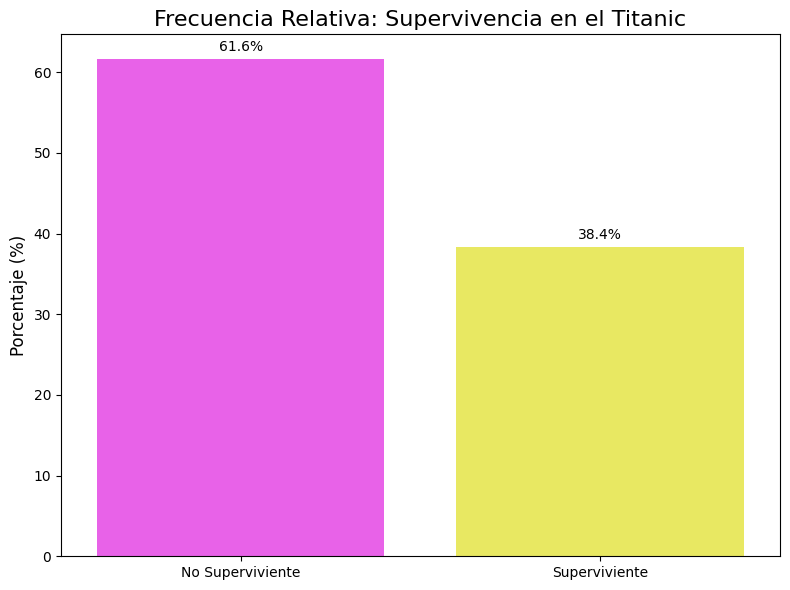

In [44]:
# Calcular las frecuencias relativas
relative_frequencies = df['alive'].value_counts(normalize=True).reset_index()
relative_frequencies.columns = ['alive', 'frequency']
relative_frequencies['frequency'] *= 100  # Convertir a porcentaje

# Crear el gráfico con sns.barplot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=relative_frequencies,
    x='alive',
    y='frequency',
    hue='alive',  # Usar hue para mapear la paleta
    dodge=False,  # Evitar separación en barras al usar hue
    palette=['magenta', 'yellow'],  # Paleta personalizada
    alpha=0.7
)

# Añadir etiquetas y título
plt.title('Frecuencia Relativa: Supervivencia en el Titanic', fontsize=16)
# plt.xlabel('Supervivencia (0 = No sobrevivió, 1 = Sobrevivió)', fontsize=12)
plt.xlabel("")
plt.ylabel('Porcentaje (%)', fontsize=12)

plt.legend([], [], frameon=False)

for index, row in relative_frequencies.iterrows():
    plt.text(index, row['frequency'] + 1, f'{row["frequency"]:.1f}%', ha='center', fontsize=10)

plt.xticks(ticks=[0, 1], labels=['No Superviviente', 'Superviviente'])  

plt.tight_layout()
plt.show()

c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

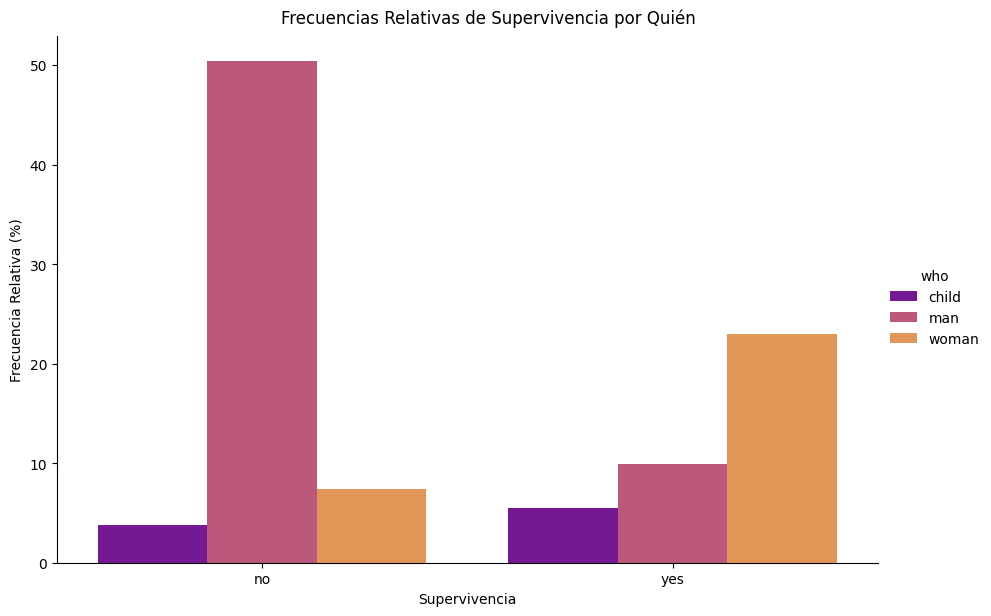

In [47]:
# Calcular frecuencias relativas
df_relative = df.groupby(['alive', 'who']).size().reset_index(name='counts')
df_relative['relative_frequency'] = df_relative['counts'] / df_relative['counts'].sum() * 100

plt.figure(figsize=(8, 6))

# Graficar con frecuencias relativas
g = sns.catplot(
    x="alive",
    y="relative_frequency",
    hue="who",
    data=df_relative,
    kind="bar",
    palette="plasma",
    height=6,
    aspect=1.5
)

# Etiquetas y título
g.set_axis_labels("Supervivencia", "Frecuencia Relativa (%)")
g.fig.suptitle("Frecuencias Relativas de Supervivencia por Quién", y=1.02)

plt.show()

c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lucas\AppData\Local\Temp\ipykernel_32884\3549399402.py:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

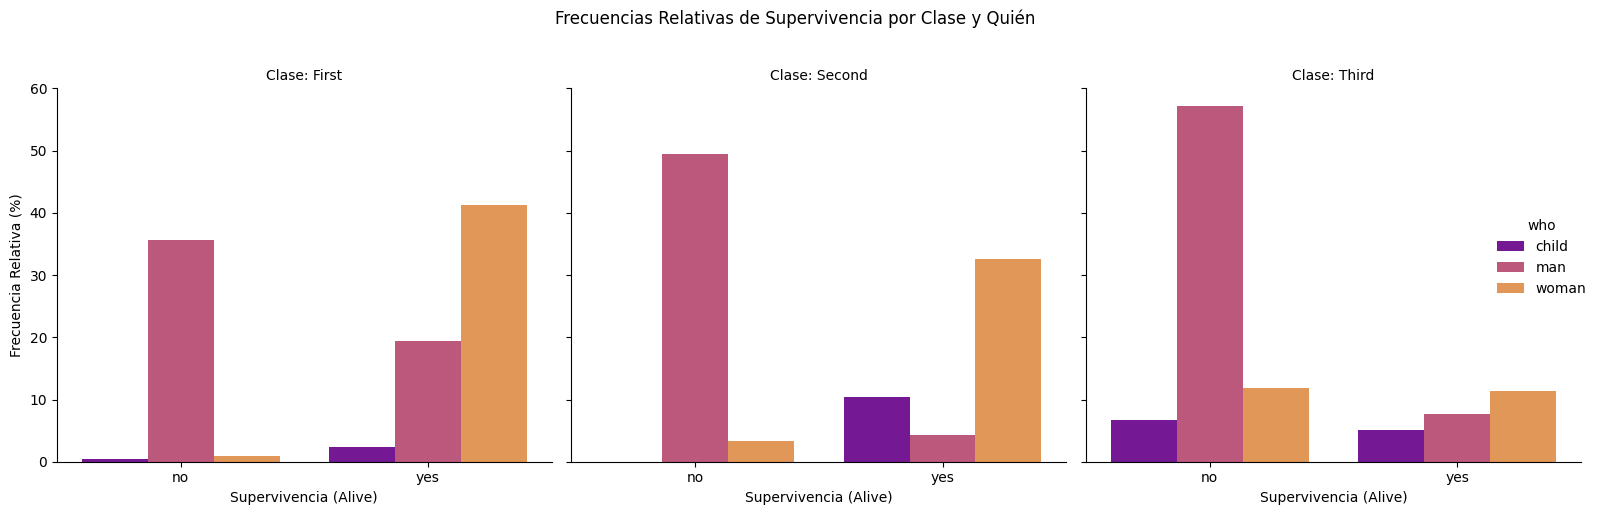

In [48]:
# Calcular frecuencias relativas
df_relative = df.groupby(['class', 'alive', 'who']).size().reset_index(name='counts')
df_relative['relative_frequency'] = df_relative.groupby(['class'])['counts'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(8, 6));

# Graficar con frecuencias relativas
g = sns.catplot(
    x="alive",
    y="relative_frequency",
    col="class",
    hue="who",
    data=df_relative,
    kind="bar",
    palette="plasma",
    height=5,
    aspect=1
)

# Añadir etiquetas y título
g.set_axis_labels("Supervivencia (Alive)", "Frecuencia Relativa (%)")
g.set_titles("Clase: {col_name}")
g.fig.suptitle("Frecuencias Relativas de Supervivencia por Clase y Quién", y=1.02)
plt.tight_layout()
plt.show();

c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lucas\AppData\Local\Temp\ipykernel_32884\1567139751.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


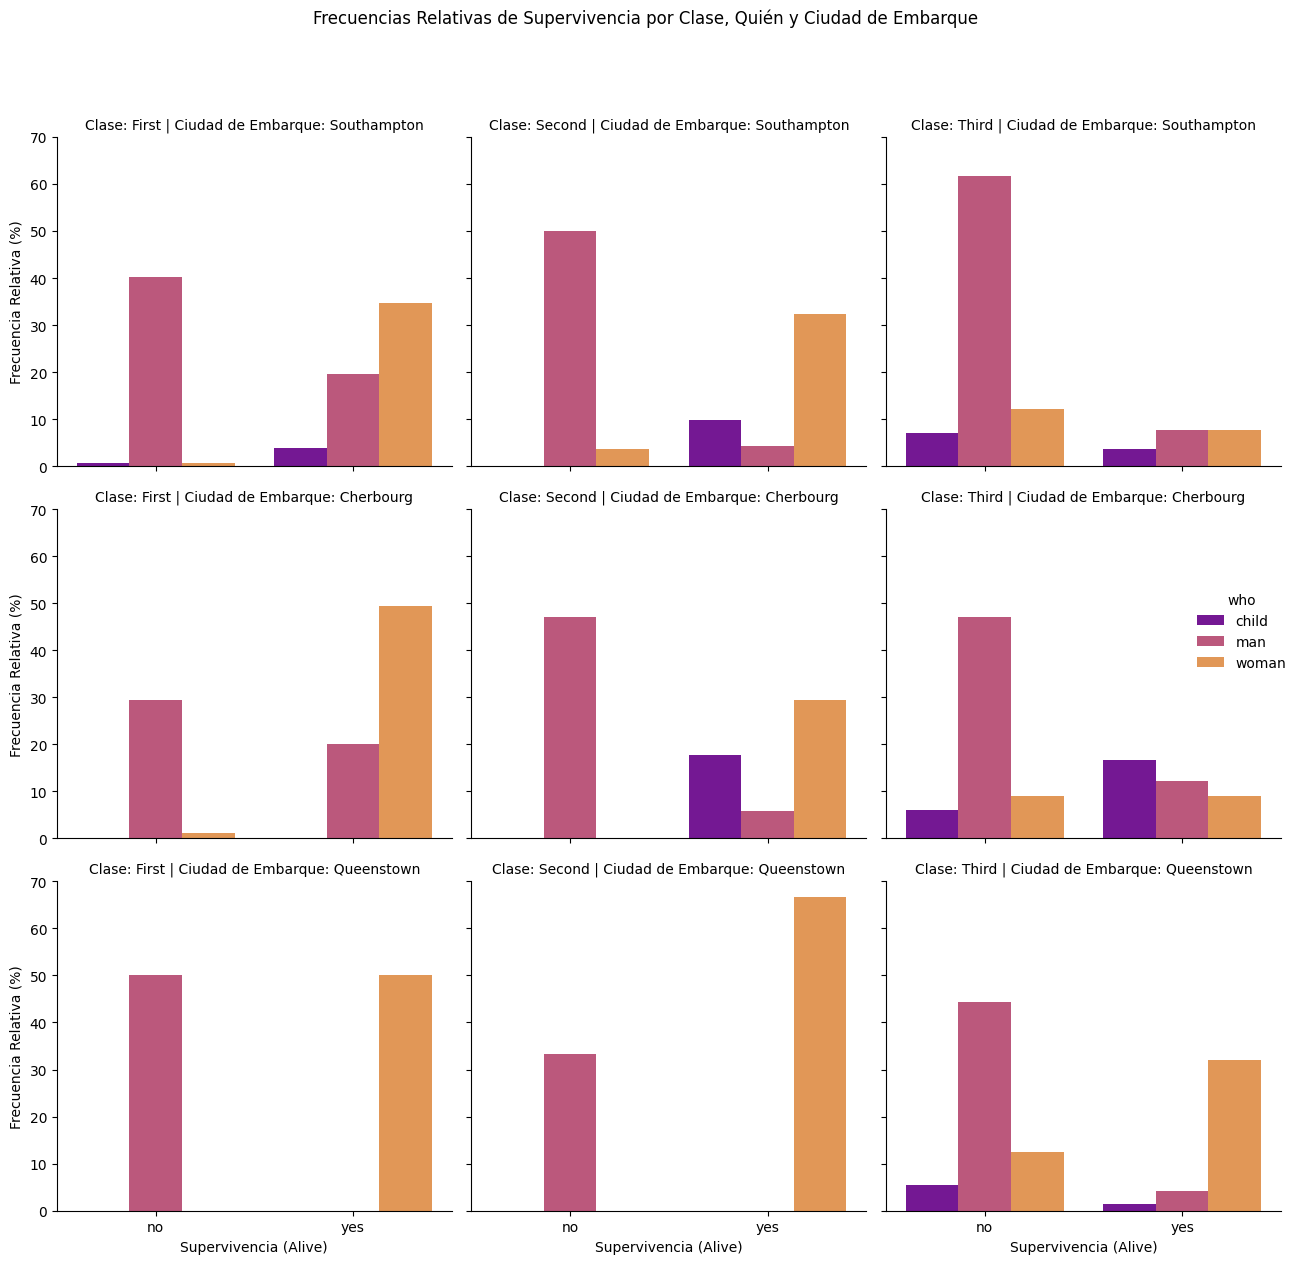

In [49]:
# Calcular frecuencias relativas
df_relative = df.groupby(['class', 'alive', 'who', 'embark_town']).size().reset_index(name='counts')
df_relative['relative_frequency'] = df_relative.groupby(['class', 'embark_town'])['counts'].transform(lambda x: x / x.sum() * 100)

# Graficar con frecuencias relativas
g = sns.catplot(
    x="alive",
    y="relative_frequency",
    col="class",
    row="embark_town",
    hue="who",
    data=df_relative,
    kind="bar",
    palette="plasma",
    height=4,
    aspect=1
)

# Añadir etiquetas y título
g.set_axis_labels("Supervivencia (Alive)", "Frecuencia Relativa (%)")
g.set_titles("Clase: {col_name} | Ciudad de Embarque: {row_name}")
g.fig.suptitle("Frecuencias Relativas de Supervivencia por Clase, Quién y Ciudad de Embarque", y=1.05)
plt.tight_layout()
plt.show()